In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv(r"https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt")

In [4]:
df.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   645 non-null    int64  
 1   Sqft         645 non-null    float64
 2   Floor        645 non-null    int64  
 3   TotalFloor   645 non-null    int64  
 4   Bedroom      645 non-null    int64  
 5   Living.Room  645 non-null    int64  
 6   Bathroom     645 non-null    int64  
 7   Price        645 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 40.4 KB


In [6]:
df.describe()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,325.159690,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,187.312152,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,1.000000,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,164.000000,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,326.000000,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,487.000000,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,648.000000,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [7]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
df.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000


In [9]:
df.isnull().sum()

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [10]:
df.corr()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
Sqft,1.000000,0.143249,0.304515,0.615608,0.455940,0.728869,0.825514
Floor,0.143249,1.000000,0.564221,0.023986,-0.023563,0.099772,0.244553
TotalFloor,0.304515,0.564221,1.000000,0.067298,0.029373,0.146132,0.333631
Bedroom,0.615608,0.023986,0.067298,1.000000,0.526532,0.643083,0.467059
Living.Room,0.455940,-0.023563,0.029373,0.526532,1.000000,0.546826,0.328788
Bathroom,0.728869,0.099772,0.146132,0.643083,0.546826,1.000000,0.605542
Price,0.825514,0.244553,0.333631,0.467059,0.328788,0.605542,1.000000


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

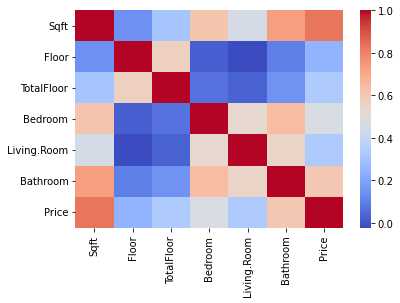

In [12]:
sns.heatmap(df.corr(), cmap='coolwarm')

In [13]:
df.columns

Index(['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom',
       'Price'],
      dtype='object')

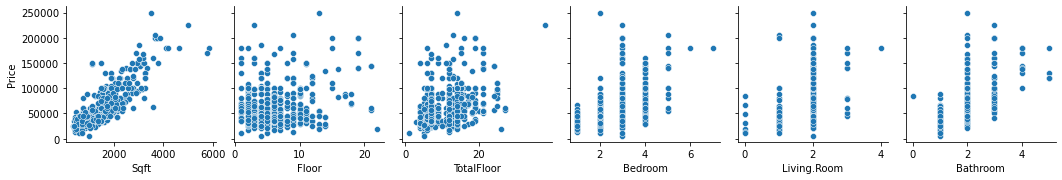

In [14]:
sns.pairplot(df, x_vars=['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom'], y_vars='Price', kind='scatter')
plt.show()

<AxesSubplot:xlabel='Living.Room', ylabel='Floor'>

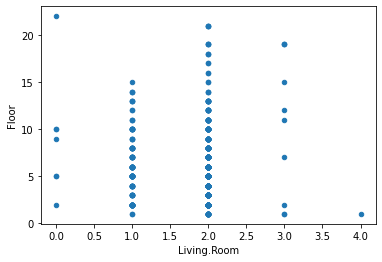

In [15]:
df.plot(kind='scatter', x='Living.Room', y='Floor')

<AxesSubplot:xlabel='Sqft', ylabel='Price'>

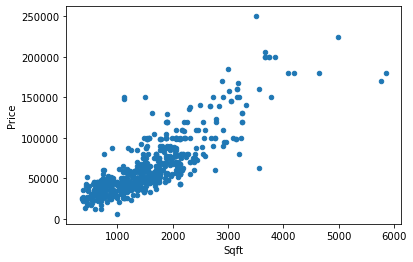

In [54]:
df.plot(kind='scatter', x='Sqft', y='Price')

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [18]:
X = df[['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom']]
y = df['Price']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=6)

In [20]:
# kn_r = KNeighborsRegressor(11)

# kn_r.fit(X_train, y_train)

In [21]:
# y_pred = kn_r.predict(X_test)
# print(mean_squared_error(y_test, y_pred))

<AxesSubplot:>

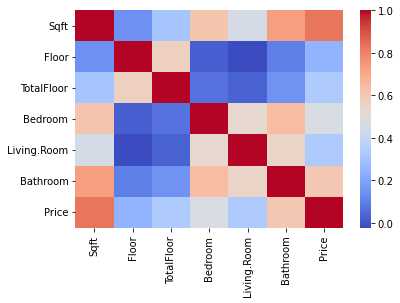

In [27]:
sns.heatmap(df.corr(), cmap='coolwarm')

In [69]:
lst = [ ]

for i in np.arange(1,15):
    model = KNeighborsRegressor(n_neighbors = i)
    model.fit(X_train, y_train)
    lst.append(model.score(X_test, y_test))

In [70]:
lst

[0.6863241810934593,
 0.6532079625401372,
 0.6930968040710918,
 0.7220064035659466,
 0.7097306096926066,
 0.7042915539526649,
 0.7069391989069063,
 0.7034562642418594,
 0.6964103561558305,
 0.6965214689072469,
 0.7117357285644085,
 0.7188968853349282,
 0.7169241209983613,
 0.7199708255909167]

As we can see 4 is giving us the maximum accuracy 

In [91]:
model = KNeighborsRegressor(4)

In [92]:
model.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=4)

In [93]:
model.score(X_test, y_test)


0.7220064035659466

In [94]:
X_test.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom
442,2052.966,5,7,4,2,2
43,1352.040,1,4,4,2,2
292,1903.530,8,13,2,2,2
245,1106.538,3,12,1,2,1
385,2312.700,7,15,4,2,2


In [95]:
model.predict([[820.66,3, 7, 3, 2, 2]])


c:\Users\User\anaconda3\files\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([41250.])

In [96]:
model.predict([[1200.66,3, 7, 3, 2, 2]])


c:\Users\User\anaconda3\files\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([57125.])

In [97]:
df.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000


In [98]:
model.predict([[810.86,4, 13, 1, 2, 1]])

c:\Users\User\anaconda3\files\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([43750.])

In [104]:
model.predict([[2010.86,4, 9, 4, 2, 2]])


c:\Users\User\anaconda3\files\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([70250.])